IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import polars as pl

GETTING DATA INSIGHT

In [2]:
df = pl.read_csv("WineQT.csv")
print(f'The shape of the csv file is: {df.shape}')
df.head()
#print(type(df))

The shape of the csv file is: (1143, 13)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### 'Id' does not add to the data, hence we can remove it.

In [3]:
df = df.drop(columns=["Id"])

In [4]:
%%capture
!pip install skimpy
from skimpy import skim

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1143   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA ┃ NA % ┃ mean    ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ fixed acidity        │  0 │    0 │   8.311 │    1.748 │    4.6 │    7.1 │    7.9 │    9.1 │  15.9 │ ▁▇▅▁▁  │  │
│ │ volatile acidity     │  0 │    0 │  0.5313 │   0.1796 │   0.12 │ 0.3925 │   0.52 │   0.64 │  1.58 │  ▃▇▅▁  │  │
│ │ citric acid          │  0 │    0 │  0.2684 │   0.1967 │      0 │   0.09 │   0.25 │   0.42 │     1 │ ▇▇▅▃▁  │  │
│ │ residual sugar       │  0 │    0 │   2.532 │    1.356 │    0.9 │    1.9 │    2.2 │    2.6 │  15.5 │   ▇▁   │  │
│ │ chlorides            │  0 │    0 │ 0.08693 │  0.04727 │  0.012 │   0.07 │  0.079 │   0.09 │ 0.611 │   ▇▁   │  │
│ │ free sulfur dioxide  │  0 │    0 │   15.62 │    10.25 │      1 │      7 │     13 │     21 │    68 │  ▇▅▃▁  │  │
│ │ total sulfur dioxide │  0 │    0 │   45.91 │    32.78 │      6 │     21 │     37 │     61 │   289 │  ▇▃▁   │  │
│ │ density              │  0 │    0 │  0.9967 │ 0.001925 │ 0.9901 │ 0.9956 │ 0.9967 │ 0.9978 │ 1.004 │  ▂▇▆▂  │  │
│ │ pH                   │  0 │    0 │   3.311 │   0.1567 │   2.74 │  3.205 │   3.31 │    3.4 │  4.01 │  ▂▇▅▁  │  │
│ │ sulphates            │  0 │    0 │  0.6577 │   0.1704 │   0.33 │   0.55 │   0.62 │   0.73 │     2 │  ▇▇▁   │  │
│ │ alcohol              │  0 │    0 │   10.44 │    1.082 │    8.4 │    9.5 │   10.2 │   11.1 │  14.9 │ ▃▇▅▂▁  │  │
│ │ quality              │  0 │    0 │   5.657 │   0.8058 │      3 │      5 │      6 │      6 │     8 │  ▁▇▇▂  │  │
│ └──────────────────────┴────┴──────┴─────────┴──────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
df.describe()

describe,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.99673,3.311015,0.657708,10.442111,5.657043
"""std""",1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.78213,0.001925,0.156664,0.170399,1.082196,0.805824
"""min""",4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
"""25%""",7.1,0.395,0.09,1.9,0.07,7.0,21.0,0.99557,3.21,0.55,9.5,5.0
"""50%""",7.9,0.52,0.25,2.2,0.079,13.0,37.0,0.99668,3.31,0.62,10.2,6.0
"""75%""",9.1,0.64,0.42,2.6,0.09,21.0,61.0,0.99785,3.4,0.73,11.1,6.0
"""max""",15.9,1.58,1.0,15.5,0.611,68.0,289.0,1.00369,4.01,2.0,14.9,8.0


#### There are no missing values in the data. We are good to go!

DATA VISUALIZATION

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

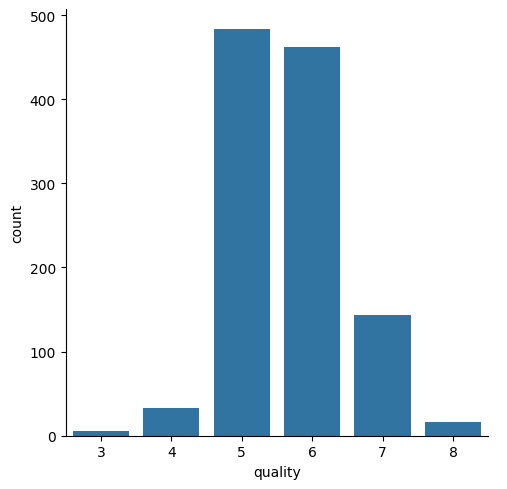

In [8]:
sns.catplot(x = 'quality', data=df, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

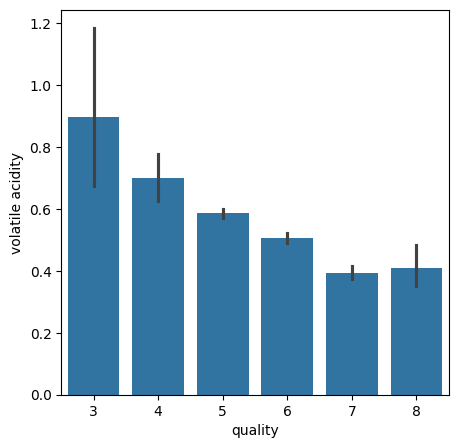

In [9]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x=df['quality'], y=df['volatile acidity'])

<Axes: xlabel='quality', ylabel='citric acid'>

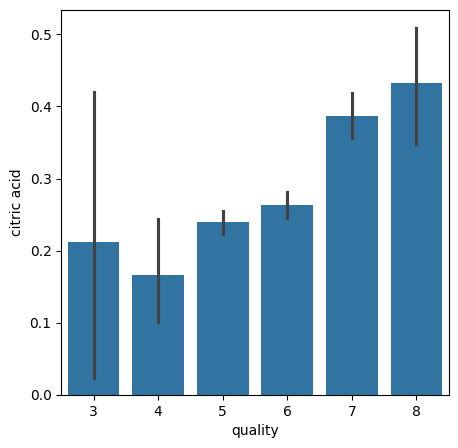

In [10]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

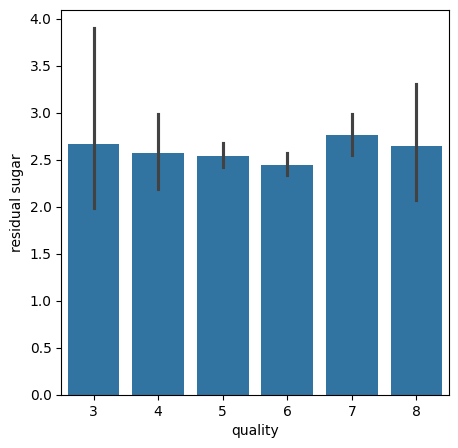

In [11]:
# residual sugar vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

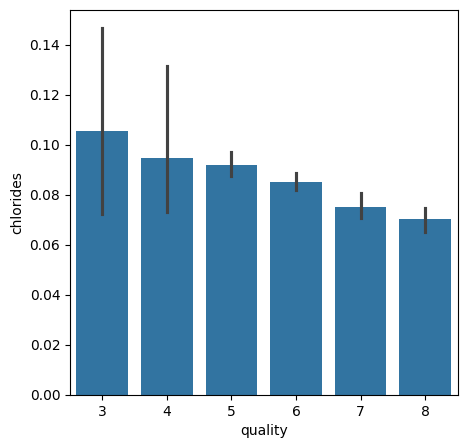

In [12]:
# chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

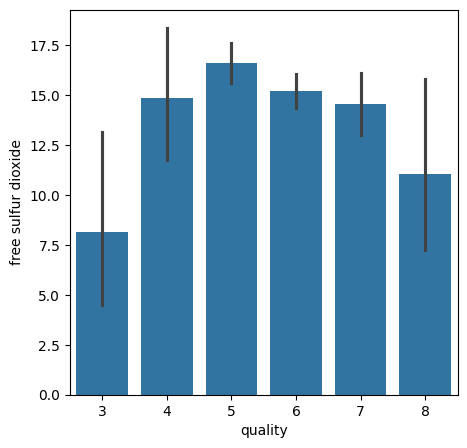

In [13]:
# free sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

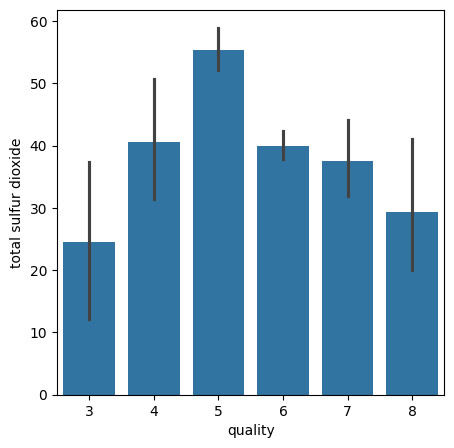

In [14]:
# total sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

<Axes: xlabel='quality', ylabel='density'>

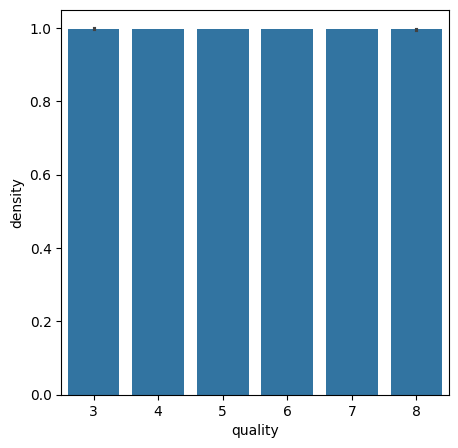

In [15]:
# density vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density', data=df)

<Axes: xlabel='quality', ylabel='pH'>

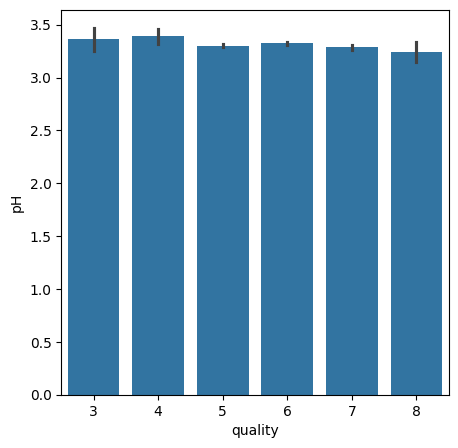

In [16]:
# pH vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH', data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

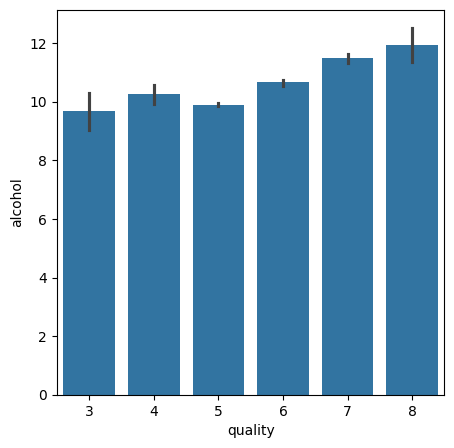

In [17]:
# alcohol vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

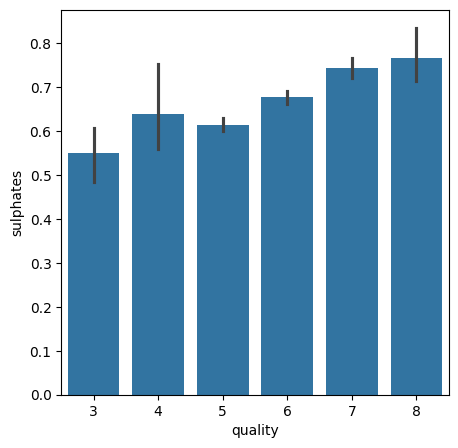

In [18]:
# sulphates vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates', data=df)

CORRELATION

<Axes: ylabel='Density'>

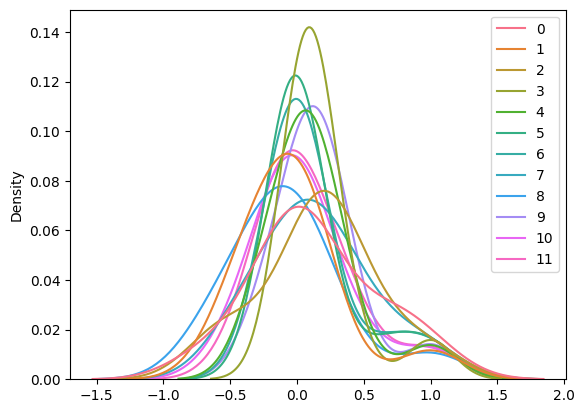

In [19]:
corr = df.corr()
sns.kdeplot(corr)

<Axes: >

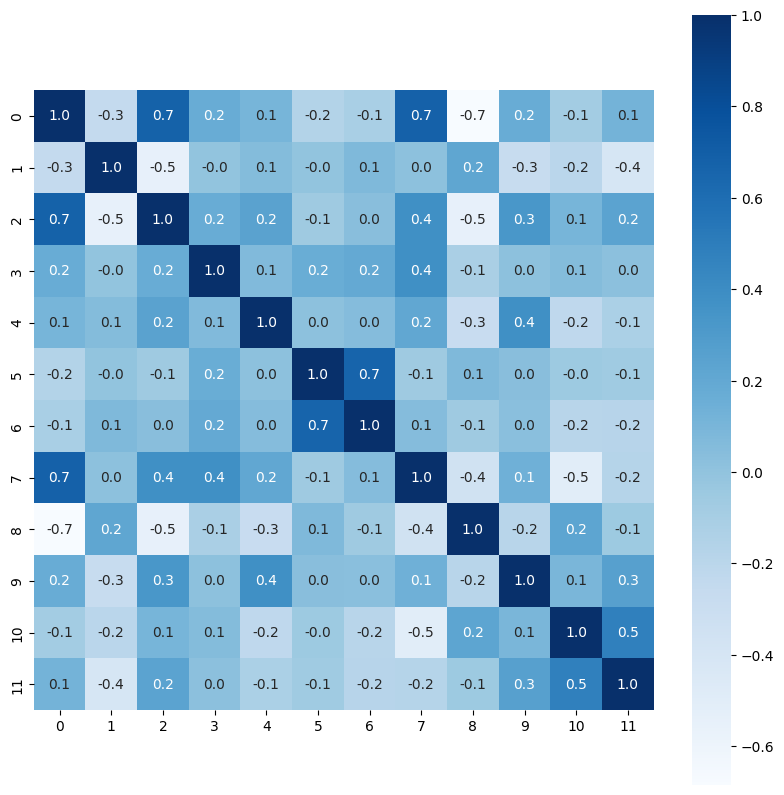

In [20]:
plot = plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot = True, cmap = 'Blues')

<Axes: >

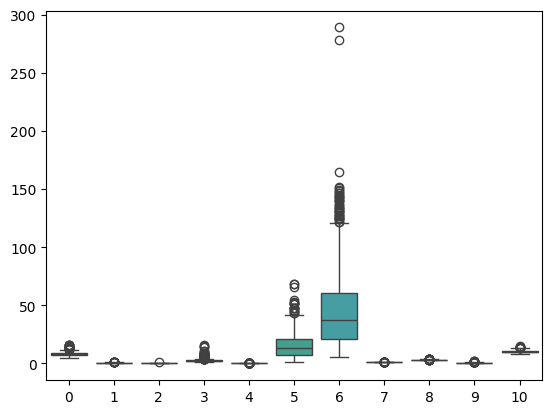

In [21]:
sns.boxplot(df.drop(columns='quality'))

Data Distribution

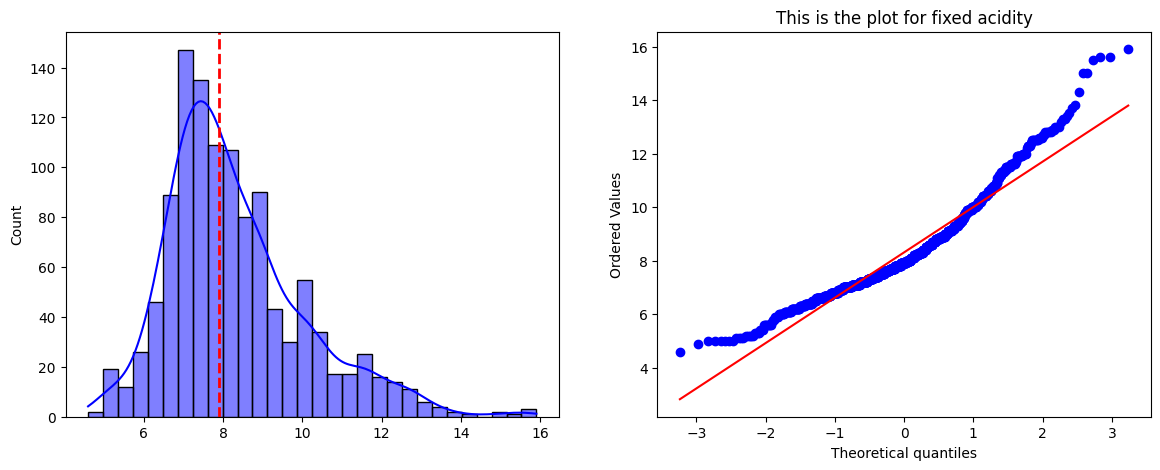

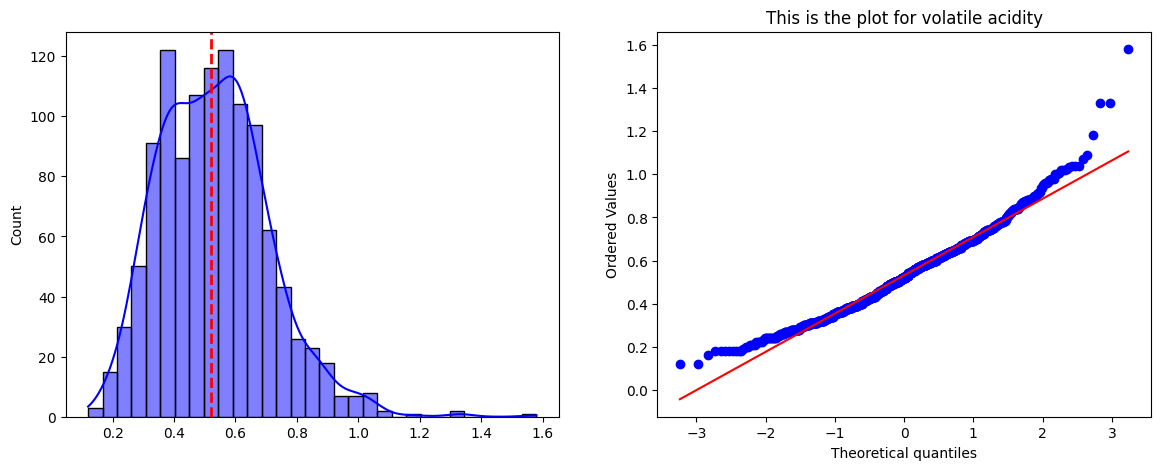

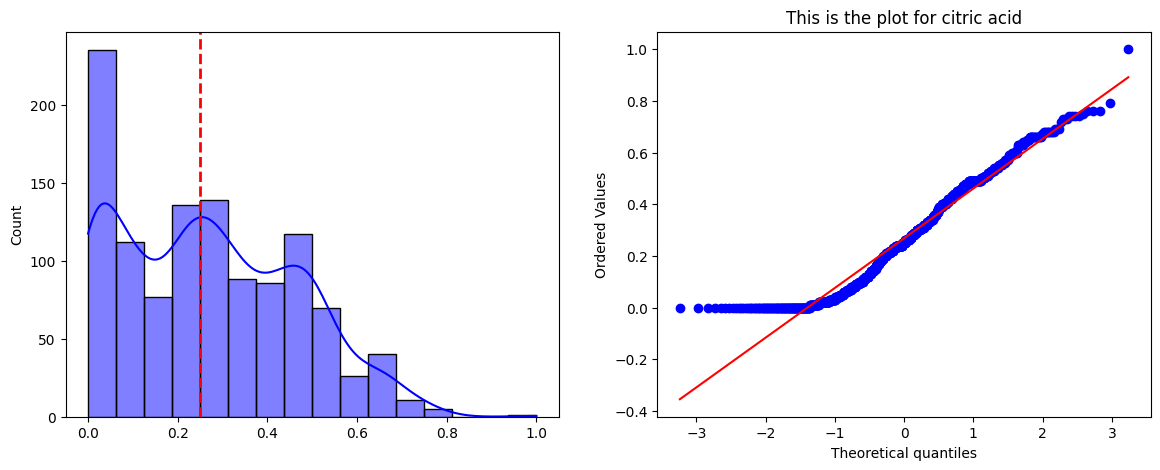

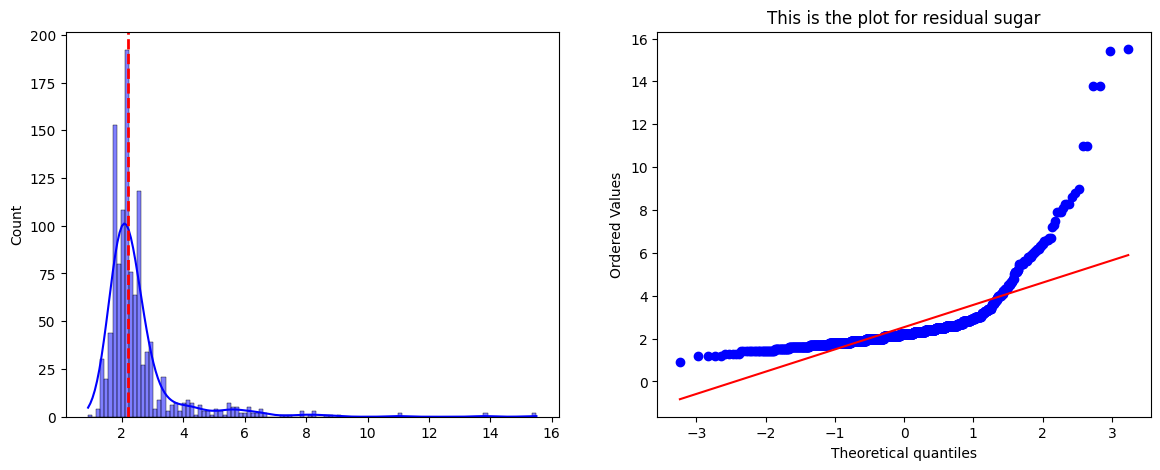

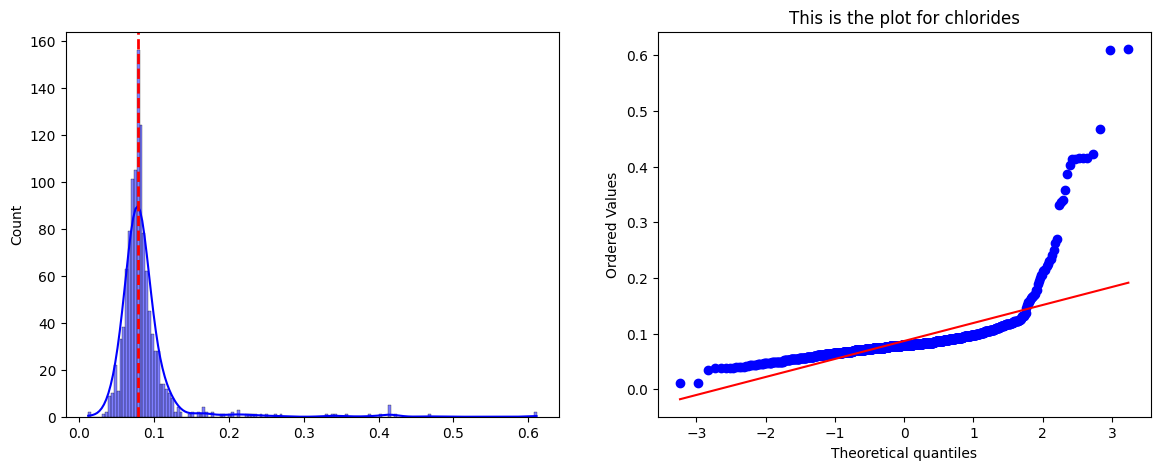

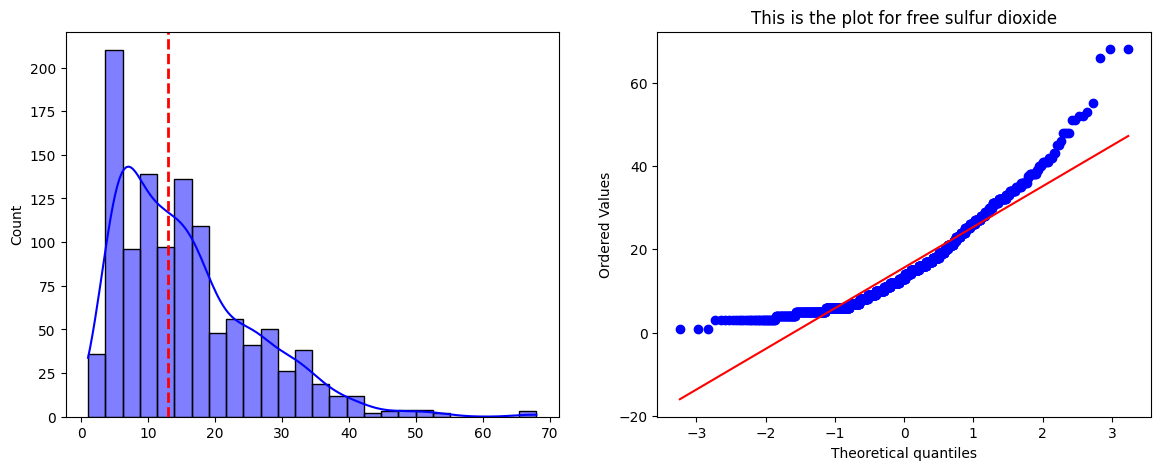

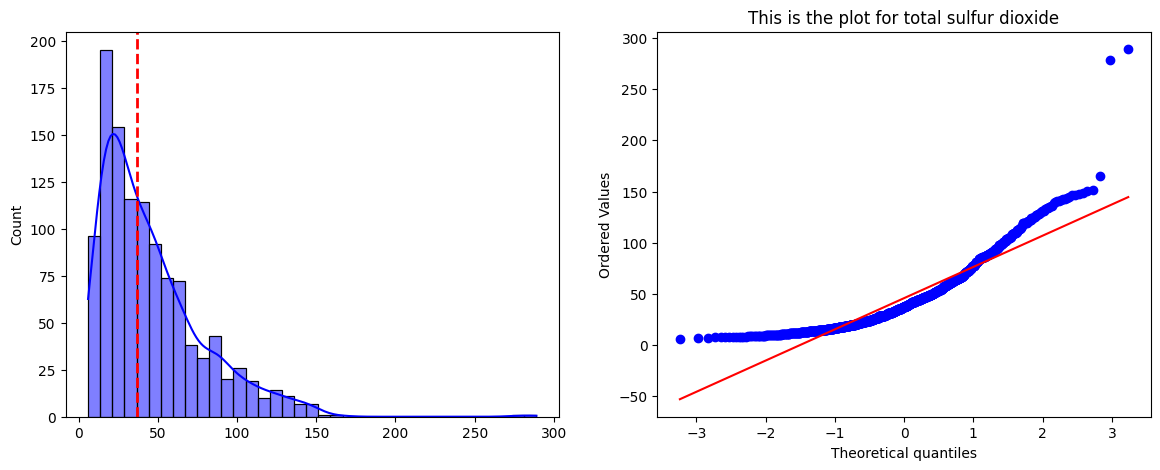

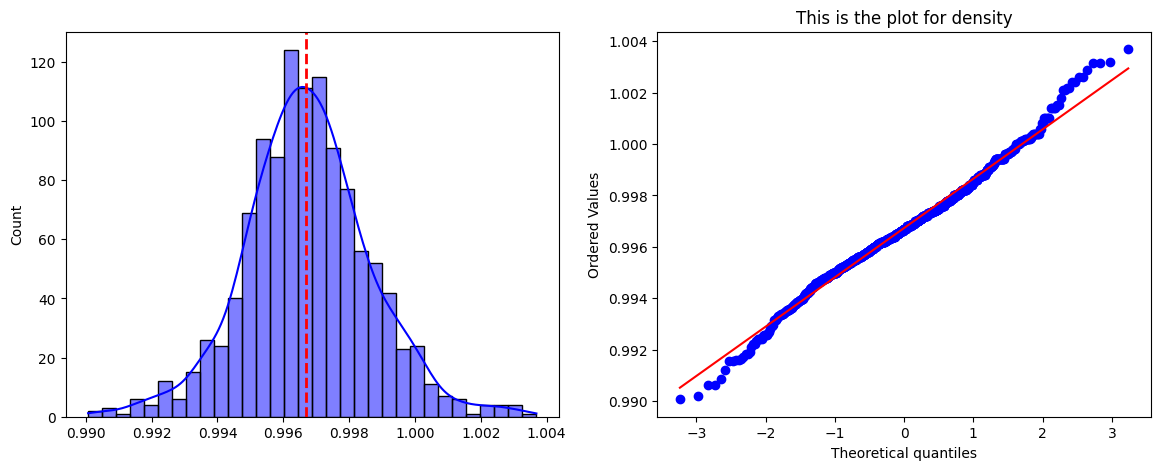

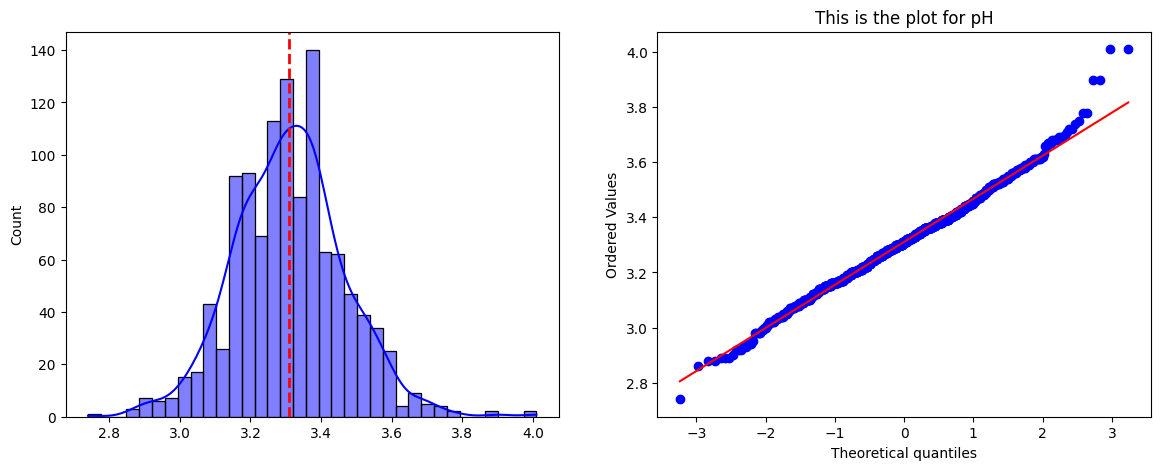

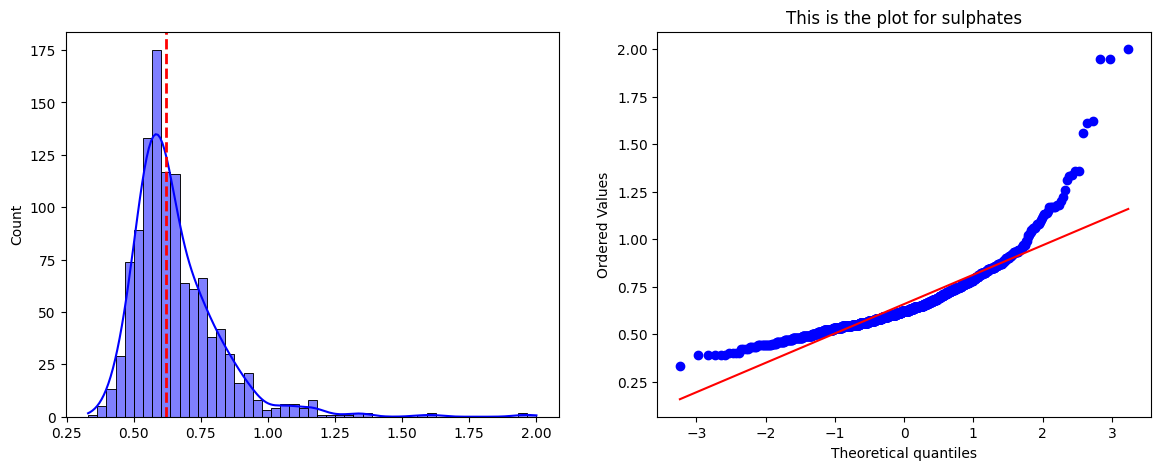

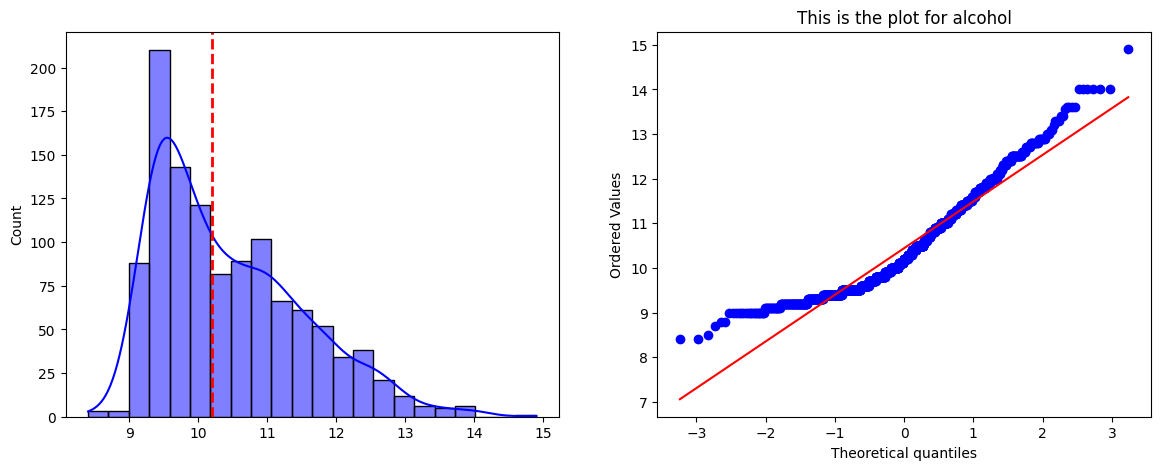

In [22]:
cols = list(df.drop('quality').columns)
for col in cols:
  plot = plt.figure(figsize = (14,5))

  plt.subplot(121)
  sns.histplot(df[col], kde=True, color='blue')
  median = np.median(df[col])
  plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')

  plt.subplot(122)
  stats.probplot(df[col], dist="norm", plot=plt)

  plt.title(f"This is the plot for {col}")

In [23]:
for col in cols:
  print(f'The skewness in {col} is: {df[col].skew()}')

The skewness in fixed acidity is: 1.0435581570203734
The skewness in volatile acidity is: 0.6806526689497615
The skewness in citric acid is: 0.37107299293186957
The skewness in residual sugar is: 4.355371093085976
The skewness in chlorides is: 6.018448660519525
The skewness in free sulfur dioxide is: 1.2296447390264758
The skewness in total sulfur dioxide is: 1.6635791721121171
The skewness in density is: 0.10226068292189876
The skewness in pH is: 0.2208480783766521
The skewness in sulphates is: 2.493987603882193
The skewness in alcohol is: 0.8621798614666305


As most of the data is right-skewed, we need to apply some transformation

PREPARING THE REPORT

In [24]:
%%capture
!pip install sweetviz
import sweetviz as sv
import pandas as pd

In [25]:
%%capture
df_pandas = df.to_pandas()
report = sv.analyze(df_pandas)
report.show_html()

DATA PREPARATION

In [26]:
# separating our dependent and independent columns
#X = df.drop(columns=['density', 'pH', 'quality'])
X = df.drop(columns=['quality'])
y = df['quality']
print(X.shape, y.shape)

(1143, 11) (1143,)


Label Binarization

In [27]:
#y = y.apply(lambda val: 0 if val>=7 else 1)
y = y.map_elements(lambda val: 0 if val >= 7 else 1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=37)

In [30]:
#X_train.head()
X_test.head()

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3
8.7,0.48,0.3,2.8,0.066,10.0,28.0,0.9964,3.33,0.67,11.2
8.7,0.625,0.16,2.0,0.101,13.0,49.0,0.9962,3.14,0.57,11.0
7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.9964,3.39,0.71,11.0
10.6,0.48,0.64,2.2,0.111,6.0,20.0,0.997,3.26,0.66,11.7


In [31]:
#y_train.head()
y_test.head()

quality
i64
0
0
1
1
1
1
1
1
1


In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(914, 11) (229, 11) (914,) (229,)


In [34]:
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

In [35]:
scaler = StandardScaler()
#scaler.fit(X_train)
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = scaler.transform(X_test_transformed)

<Axes: >

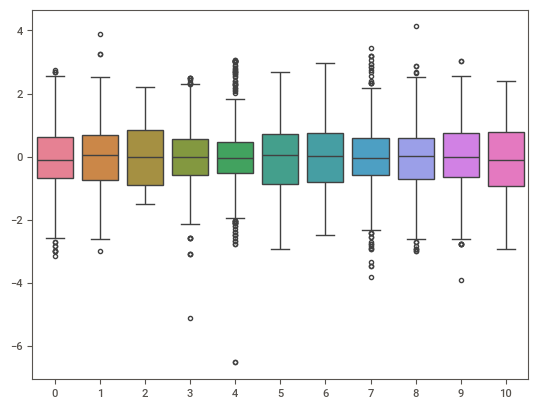

In [36]:
sns.boxplot(X_train_transformed)

DEFINING THE MODEL AND TRAINING

In [37]:
'''models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
	print()
'''

"models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]\n\nfor i in range(3):\n\tmodels[i].fit(xtrain, ytrain)\n\n\tprint(f'{models[i]} : ')\n\tprint('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))\n\tprint('Validation Accuracy : ', metrics.roc_auc_score(\n\t\tytest, models[i].predict(xtest)))\n\tprint()\n"

In [38]:
model = RandomForestClassifier()

In [39]:
model.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [40]:
y_pred = model.predict(X_test_transformed)
print(y_pred.shape)

(229,)


In [41]:
test_accuracy = accuracy_score(y_pred, y_test)
test_accuracy

0.9082969432314411

In [42]:
import numpy as np

print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in y_pred:", np.unique(y_pred))


Unique labels in y_test: [0 1]
Unique labels in y_pred: [0 1]


In [43]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 24,   2],
       [ 19, 184]])

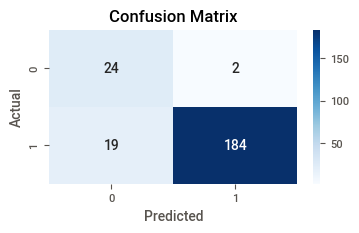

In [44]:
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

DEPLOYMENT

Predictive System

In [46]:
input_data = (7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4)
#input_data = (12.8,0.3,0.74,2.6,0.095,9.0,28.0,0.9994,3.2,0.77,10.8)

input_to_numpy = np.asarray(input_data)
input_to_numpy = input_to_numpy.reshape(1,-1)

prediction = model.predict(input_to_numpy)

if prediction[0]==1:
  print("bad quality wine")
else:
  print("good quality wine")

bad quality wine
